# Machine Learning Engineer Nanodegree
## Supervised Learning
## Project: Finding Donors for *CharityML*

Welcome to the second project of the Machine Learning Engineer Nanodegree! In this notebook, some template code has already been provided for you, and it will be your job to implement the additional functionality necessary to successfully complete this project. Sections that begin with **'Implementation'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section and the specifics of the implementation are marked in the code block with a `'TODO'` statement. Please be sure to read the instructions carefully!

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.  

>**Note:** Please specify WHICH VERSION OF PYTHON you are using when submitting this notebook. Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

## Getting Started

In this project, you will employ several supervised algorithms of your choice to accurately model individuals' income using data collected from the 1994 U.S. Census. You will then choose the best candidate algorithm from preliminary results and further optimize this algorithm to best model the data. Your goal with this implementation is to construct a model that accurately predicts whether an individual makes more than $50,000. This sort of task can arise in a non-profit setting, where organizations survive on donations.  Understanding an individual's income can help a non-profit better understand how large of a donation to request, or whether or not they should reach out to begin with.  While it can be difficult to determine an individual's general income bracket directly from public sources, we can (as we will see) infer this value from other publically available features. 

The dataset for this project originates from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Census+Income). The datset was donated by Ron Kohavi and Barry Becker, after being published in the article _"Scaling Up the Accuracy of Naive-Bayes Classifiers: A Decision-Tree Hybrid"_. You can find the article by Ron Kohavi [online](https://www.aaai.org/Papers/KDD/1996/KDD96-033.pdf). The data we investigate here consists of small changes to the original dataset, such as removing the `'fnlwgt'` feature and records with missing or ill-formatted entries.

----
## Exploring the Data
Run the code cell below to load necessary Python libraries and load the census data. Note that the last column from this dataset, `'income'`, will be our target label (whether an individual makes more than, or at most, $50,000 annually). All other columns are features about each individual in the census database.

In [19]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
from time import time
from IPython.display import display # Allows the use of display() for DataFrames

# Import supplementary visualization code visuals.py
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

# Load the Census dataset
data = pd.read_csv("census.csv")

# Success - Display the first record
display(data.head(n=3))
display(data.tail(n=3))

,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,13.0,United-States,<=50K
2,38,Private,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40.0,United-States,<=50K


,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
45219,38,Private,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Husband,White,Male,0.0,0.0,50.0,United-States,<=50K
45220,44,Private,Bachelors,13.0,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455.0,0.0,40.0,United-States,<=50K
45221,35,Self-emp-inc,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,60.0,United-States,>50K


### Implementation: Data Exploration
A cursory investigation of the dataset will determine how many individuals fit into either group, and will tell us about the percentage of these individuals making more than \$50,000. In the code cell below, you will need to compute the following:
- The total number of records, `'n_records'`
- The number of individuals making more than \$50,000 annually, `'n_greater_50k'`.
- The number of individuals making at most \$50,000 annually, `'n_at_most_50k'`.
- The percentage of individuals making more than \$50,000 annually, `'greater_percent'`.

**Hint:** You may need to look at the table above to understand how the `'income'` entries are formatted. 

In [20]:
# TODO: Total number of records
n_records = len(data)

# TODO: Number of records where individual's income is more than $50,000
n_greater_50k = len(data.loc[data['income'] == '>50K'])


# TODO: Number of records where individual's income is at most $50,000
n_at_most_50k = len(data.loc[data['income'] == '<=50K'])


# TODO: Percentage of individuals whose income is more than $50,000
greater_percent = 100.0*float(n_greater_50k)/float(n_records)

# Print the results
print "Total number of records: {}".format(n_records)
print "Individuals making more than $50,000: {}".format(n_greater_50k)
print "Individuals making at most $50,000: {}".format(n_at_most_50k)
print "Percentage of individuals making more than $50,000: {:.2f}%".format(greater_percent)

Total number of records: 45222
Individuals making more than $50,000: 11208
Individuals making at most $50,000: 34014
Percentage of individuals making more than $50,000: 24.78%


In [21]:
# using value_counts

n_records = len(data)

# TODO: Number of records where individual's income is more than $50,000
n_at_most_50k , n_greater_50k = data['income'].value_counts()

# TODO: Percentage of individuals whose income is more than $50,000
greater_percent = 100.0*float(n_greater_50k)/float(n_records)

# Print the results
print "Total number of records: {}".format(n_records)
print "Individuals making more than $50,000: {}".format(n_greater_50k)
print "Individuals making at most $50,000: {}".format(n_at_most_50k)
print "Percentage of individuals making more than $50,000: {:.2f}%".format(greater_percent)



Total number of records: 45222
Individuals making more than $50,000: 11208
Individuals making at most $50,000: 34014
Percentage of individuals making more than $50,000: 24.78%


----
## Preparing the Data
Before data can be used as input for machine learning algorithms, it often must be cleaned, formatted, and restructured — this is typically known as **preprocessing**. Fortunately, for this dataset, there are no invalid or missing entries we must deal with, however, there are some qualities about certain features that must be adjusted. This preprocessing can help tremendously with the outcome and predictive power of nearly all learning algorithms.

### Transforming Skewed Continuous Features
A dataset may sometimes contain at least one feature whose values tend to lie near a single number, but will also have a non-trivial number of vastly larger or smaller values than that single number.  Algorithms can be sensitive to such distributions of values and can underperform if the range is not properly normalized. With the census dataset two features fit this description: '`capital-gain'` and `'capital-loss'`. 

Run the code cell below to plot a histogram of these two features. Note the range of the values present and how they are distributed.

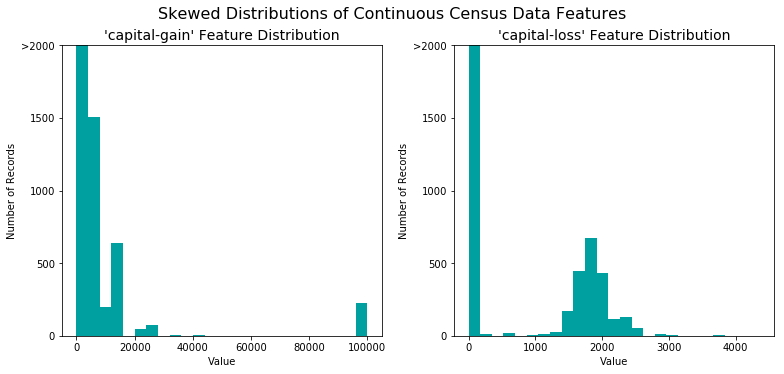

In [22]:
# Split the data into features and target label
income_raw = data['income']
features_raw = data.drop('income', axis = 1)

# Visualize skewed continuous features of original data
vs.distribution(data)

For highly-skewed feature distributions such as `'capital-gain'` and `'capital-loss'`, it is common practice to apply a <a href="https://en.wikipedia.org/wiki/Data_transformation_(statistics)">logarithmic transformation</a> on the data so that the very large and very small values do not negatively affect the performance of a learning algorithm. Using a logarithmic transformation significantly reduces the range of values caused by outliers. Care must be taken when applying this transformation however: The logarithm of `0` is undefined, so we must translate the values by a small amount above `0` to apply the the logarithm successfully.

Run the code cell below to perform a transformation on the data and visualize the results. Again, note the range of values and how they are distributed. 

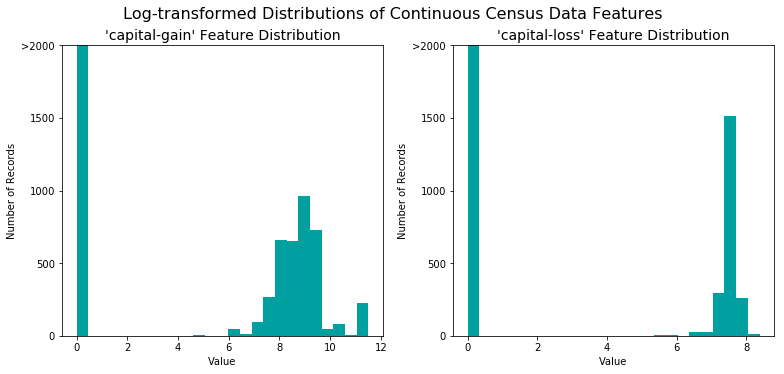

In [23]:
# Log-transform the skewed features
skewed = ['capital-gain', 'capital-loss']
features_raw[skewed] = data[skewed].apply(lambda x: np.log(x + 1))

# Visualize the new log distributions
vs.distribution(features_raw, transformed = True)

### Normalizing Numerical Features
In addition to performing transformations on features that are highly skewed, it is often good practice to perform some type of scaling on numerical features. Applying a scaling to the data does not change the shape of each feature's distribution (such as `'capital-gain'` or `'capital-loss'` above); however, normalization ensures that each feature is treated equally when applying supervised learners. Note that once scaling is applied, observing the data in its raw form will no longer have the same original meaning, as exampled below.

Run the code cell below to normalize each numerical feature. We will use [`sklearn.preprocessing.MinMaxScaler`](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html) for this.

In [24]:
# Import sklearn.preprocessing.StandardScaler
from sklearn.preprocessing import MinMaxScaler

# Initialize a scaler, then apply it to the features
scaler = MinMaxScaler()
numerical = ['age', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']
features_raw[numerical] = scaler.fit_transform(data[numerical])

# Show an example of a record with scaling applied
display(features_raw.head(n = 1))

,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,0.30137,State-gov,Bachelors,0.8,Never-married,Adm-clerical,Not-in-family,White,Male,0.02174,0.0,0.397959,United-States


### Implementation: Data Preprocessing

From the table in **Exploring the Data** above, we can see there are several features for each record that are non-numeric. Typically, learning algorithms expect input to be numeric, which requires that non-numeric features (called *categorical variables*) be converted. One popular way to convert categorical variables is by using the **one-hot encoding** scheme. One-hot encoding creates a _"dummy"_ variable for each possible category of each non-numeric feature. For example, assume `someFeature` has three possible entries: `A`, `B`, or `C`. We then encode this feature into `someFeature_A`, `someFeature_B` and `someFeature_C`.

|   | someFeature |                    | someFeature_A | someFeature_B | someFeature_C |
| :-: | :-: |                            | :-: | :-: | :-: |
| 0 |  B  |  | 0 | 1 | 0 |
| 1 |  C  | ----> one-hot encode ----> | 0 | 0 | 1 |
| 2 |  A  |  | 1 | 0 | 0 |

Additionally, as with the non-numeric features, we need to convert the non-numeric target label, `'income'` to numerical values for the learning algorithm to work. Since there are only two possible categories for this label ("<=50K" and ">50K"), we can avoid using one-hot encoding and simply encode these two categories as `0` and `1`, respectively. In code cell below, you will need to implement the following:
 - Use [`pandas.get_dummies()`](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html?highlight=get_dummies#pandas.get_dummies) to perform one-hot encoding on the `'features_raw'` data.
 - Convert the target label `'income_raw'` to numerical entries.
   - Set records with "<=50K" to `0` and records with ">50K" to `1`.

In [25]:
# TODO: One-hot encode the 'features_raw' data using pandas.get_dummies()
features = pd.get_dummies(features_raw)

# TODO: Encode the 'income_raw' data to numerical values
# income = data['income'].apply(lambda x: 0 if x=='<=50K' else 1)
# or using LabelEncoder
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
income = encoder.fit_transform(income_raw)

# Print the number of features after one-hot encoding
encoded = list(features.columns)
print "{} total features after one-hot encoding.".format(len(encoded))

# Uncomment the following line to see the encoded feature names
# print encoded
print income

103 total features after one-hot encoding.
[0 0 0 ..., 0 0 1]


### Shuffle and Split Data
Now all _categorical variables_ have been converted into numerical features, and all numerical features have been normalized. As always, we will now split the data (both features and their labels) into training and test sets. 80% of the data will be used for training and 20% for testing.

Run the code cell below to perform this split.

In [26]:
# Import train_test_split
from sklearn.model_selection  import train_test_split

# Split the 'features' and 'income' data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, income, test_size = 0.2, random_state = 0)

# Show the results of the split
print "Training set has {} samples.".format(X_train.shape[0])
print "Testing set has {} samples.".format(X_test.shape[0])

Training set has 36177 samples.
Testing set has 9045 samples.


----
## Evaluating Model Performance
In this section, we will investigate four different algorithms, and determine which is best at modeling the data. Three of these algorithms will be supervised learners of your choice, and the fourth algorithm is known as a *naive predictor*.

### Metrics and the Naive Predictor
*CharityML*, equipped with their research, knows individuals that make more than \$50,000 are most likely to donate to their charity. Because of this, *CharityML* is particularly interested in predicting who makes more than \$50,000 accurately. It would seem that using **accuracy** as a metric for evaluating a particular model's performace would be appropriate. Additionally, identifying someone that *does not* make more than \$50,000 as someone who does would be detrimental to *CharityML*, since they are looking to find individuals willing to donate. Therefore, a model's ability to precisely predict those that make more than \$50,000 is *more important* than the model's ability to **recall** those individuals. We can use **F-beta score** as a metric that considers both precision and recall:

$$ F_{\beta} = (1 + \beta^2) \cdot \frac{precision \cdot recall}{\left( \beta^2 \cdot precision \right) + recall} $$

In particular, when $\beta = 0.5$, more emphasis is placed on precision. This is called the **F$_{0.5}$ score** (or F-score for simplicity).

Looking at the distribution of classes (those who make at most \$50,000, and those who make more), it's clear most individuals do not make more than \$50,000. This can greatly affect **accuracy**, since we could simply say *"this person does not make more than \$50,000"* and generally be right, without ever looking at the data! Making such a statement would be called **naive**, since we have not considered any information to substantiate the claim. It is always important to consider the *naive prediction* for your data, to help establish a benchmark for whether a model is performing well. That been said, using that prediction would be pointless: If we predicted all people made less than \$50,000, *CharityML* would identify no one as donors. 

### Question 1 - Naive Predictor Performace
*If we chose a model that always predicted an individual made more than \$50,000, what would that model's accuracy and F-score be on this dataset?*  
**Note:** You must use the code cell below and assign your results to `'accuracy'` and `'fscore'` to be used later.

In [27]:
# TODO: Calculate accuracy

# number of correct predictions is number of all records where income is '>50K'
correct_predictions = float(n_greater_50k)
all_predictions = float(n_records)
accuracy = correct_predictions/all_predictions

# TODO: Calculate F-score using the formula above for beta = 0.5

true_positive = correct_predictions
# only postive will be predicted
false_negative = 0.0
# false predicted as positive will be the supplement to all predictions
false_positive = n_records - correct_predictions
recall = true_positive/(true_positive + false_negative)
precision = true_positive/(true_positive + false_positive)

beta = 0.5
beta_square = beta*beta
fscore = (1+beta_square)*(precision * recall)/((beta_square*precision)+recall)

# Print the results 
print "Naive Predictor: [Accuracy score: {:.4f}, F-score: {:.4f}]".format(accuracy, fscore)



Naive Predictor: [Accuracy score: 0.2478, F-score: 0.2917]


###  Supervised Learning Models
**The following supervised learning models are currently available in** [`scikit-learn`](http://scikit-learn.org/stable/supervised_learning.html) **that you may choose from:**
- Gaussian Naive Bayes (GaussianNB)
- Decision Trees
- Ensemble Methods (Bagging, AdaBoost, Random Forest, Gradient Boosting)
- K-Nearest Neighbors (KNeighbors)
- Stochastic Gradient Descent Classifier (SGDC)
- Support Vector Machines (SVM)
- Logistic Regression

### Question 2 - Model Application
List three of the supervised learning models above that are appropriate for this problem that you will test on the census data. For each model chosen
- *Describe one real-world application in industry where the model can be applied.* (You may need to do research for this — give references!)
- *What are the strengths of the model; when does it perform well?*
- *What are the weaknesses of the model; when does it perform poorly?*
- *What makes this model a good candidate for the problem, given what you know about the data?*

**Answer: **

Solving the problem means to find a model which separates the data points with the income greater than 50K. It means that the  dependent variable 'income' is categorical. This is a binary classification problem and I think that a good candidate model will be the DecisionTree model with its reinforced ensamble version GradientBoosting and interesting will be also a comparison to Logistic Regression.

Model requirements:
- time for learning is not critical
- we don't need exceptionaly fast prediction times (we don't need realtime)
- it is an advantage if we are able to decsribe the model simply
- models which deliver dichotomous outcome are suitable (but not only)
- models which are expecting categorical input are suitable 

Model: **Logistic Regression**
Logistic regression is a regression model where the dependent variable (DV) is categorical. It may be used to predict whether a patient has a given disease (e.g. diabetes; coronary heart disease), based on observed characteristics of the patient (age, sex, body mass index, results of various blood tests, etc.). Business application would be to predict the likelihood of a homeowner defaulting on a mortgage or predicting the crime rate of a states based on drug usage, number of gangs...

As a real world example I like "Using Binary Logistic Regression to Investigate High Employee Turnover". Algorithm is used to identify the reason of the suden rise of the attrition in a company. They collected basic data about each of the new hires, including the employee’s gender, position, pay classification, shift worked, prior years of manufacturing experience, and length of commute.
http://blog.minitab.com/blog/real-world-quality-improvement/using-binary-logistic-regression-to-investigate-high-employee-turnover. They found out the reason was a distance to commute.  

Advantages of Logistic Regression are:

a) is fast
b) is good also if dealing with high number of features
c) is good for models where the outcome of interest is dichotomous
d) is easy to explain
e) fits to all requirements mentioned above

Limitations of Logistic Regression (http://classroom.synonym.com/disadvantages-logistic-regression-8574447.html)

a) Relevant independet variable must be properly identified otherwise the model doesn't work

b) Works well for categorical outcomes. Continues data must be converted into categorical. For example: by splitting them into intervals. This sacrifices the precision.

c) Major disadvantage: ***"Logistic regression requires that each data point be independent of all other data points.*** *If observations are related to one another, then the model will tend to overweight the significance of those observations. This is a major disadvantage, because a lot of scientific and social-scientific research relies on research techniques involving multiple observations of the same individuals. For example, drug trials often use matched pair designs that compare two similar individuals, one taking a drug and the other taking a placebo. Logistic regression is not an appropriate technique for studies using this design."*

d) Logistic regression models are vulnerable to overfitting, but not so much as 

I have chosen this model because it is good for solving categorical problems, I am able to define relevant dependent variables. I need to separate datapoints with two possible outcomes for 'income' and this is what logistic regression does.

Model: **Decision Trees**  
Decision Tree model is easy to understand because it mimics human behaviour very closely. Using decision tree classifier we can quickly identify most important features. 

Disadvantages of decision tree model is overfitting. This problem can be solved by tuning model parameters. Dealing with continues numeric variables, decision tree looses information when it categorizes variables into different categories. Other limitations of Decision Trees (https://en.wikipedia.org/wiki/Decision_tree_learning#Limitations)
Trees do not tend to be as accurate as other approaches. May be not robust enough and small change in data can result in a big change in the tree. Learners can create over-complex trees which doesn't generalize well from training data. To avoid this problem some methods i.e. prunning can be employed.
There are concepts that are hard to learn because decision trees do not express them easily, such as XOR, parity or multiplexer problems.

There are a lot of aplications in real world how this algorithm can be used. For example:
Object recognition: Tree based classification has been used recently for recognizing three dimensional objects and for high level vision. Manufacturing and Production: Decision trees have been recently used to non-destructively test welding quality, for semiconductor manufacturing, for increasing productivity, for material procurement method selection, to accelerate rotogravure printing, for process optimization in electrochemical machining, to schedule printed circuit board assembly lines, to uncover flaws in a Boeing manufacturing processand for quality control. For a recent review of the use of machine learning (decision trees and other techniques) in scheduling. The full overview can be found here: http://www.cbcb.umd.edu/~salzberg/docs/murthy_thesis/survey/node32.html

One interesting example how Decision Tree model can be used in power distribution system to predict transient stability in realtime: http://libraprod.lib.virginia.edu/catalog/libra-oa:2558

Decision Tress is good candidate for solving of the problem as it fits to all requirements mentioned above

Model: **Ensamble Method Gradient Boosting **  
http://machinelearningmastery.com/gentle-introduction-gradient-boosting-algorithm-machine-learning/
Gradient boosting can be used anywhere where decision trees are used. 
It is still quite easy to understand. It si possible to investigate the partial results and understand insights of the model. 

Disadvantage is that it can consume more computing time and needs more parameters to be tuned in a search for optimal model. 
There are usualy three parameters to tune: number of trees, maximal depth of the trees and learning rate.

Realworld example: "Smart City Mobility Application—Gradient Boosting Trees for Mobility Prediction and Analysis Based on Crowdsourced Data"
http://www.mdpi.com/1424-8220/15/7/15974/pdf

Sources about Gradient Boosting:
http://arogozhnikov.github.io/2016/06/24/gradient_boosting_explained.html
media.nips.cc/Conferences/2007/.../schapire-NIPS-07-tutorial.pdf
https://www.researchgate.net/publication/259653472_Gradient_Boosting_Machines_A_Tutorial

It is a good candidate because it is enhacement of the Decision Tree and will compensate the weaknesses of decision trees.

### Implementation - Creating a Training and Predicting Pipeline
To properly evaluate the performance of each model you've chosen, it's important that you create a training and predicting pipeline that allows you to quickly and effectively train models using various sizes of training data and perform predictions on the testing data. Your implementation here will be used in the following section.
In the code block below, you will need to implement the following:
 - Import `fbeta_score` and `accuracy_score` from [`sklearn.metrics`](http://scikit-learn.org/stable/modules/classes.html#sklearn-metrics-metrics).
 - Fit the learner to the sampled training data and record the training time.
 - Perform predictions on the test data `X_test`, and also on the first 300 training points `X_train[:300]`.
   - Record the total prediction time.
 - Calculate the accuracy score for both the training subset and testing set.
 - Calculate the F-score for both the training subset and testing set.
   - Make sure that you set the `beta` parameter!

In [28]:
# TODO: Import two metrics from sklearn - fbeta_score and accuracy_score

from sklearn.metrics import fbeta_score
from sklearn.metrics import accuracy_score

def train_predict(learner, sample_size, X_train, y_train, X_test, y_test): 
    '''
    inputs:
       - learner: the learning algorithm to be trained and predicted on
       - sample_size: the size of samples (number) to be drawn from training set
       - X_train: features training set
       - y_train: income training set
       - X_test: features testing set
       - y_test: income testing set
    '''
    
    results = {}
    
    # TODO: Fit the learner to the training data using slicing with 'sample_size'
    start = time() # Get start time
    learner = learner.fit(X_train[:sample_size], y_train[:sample_size])
    end = time() # Get end time
    
    # TODO: Calculate the training time
    results['train_time'] = end - start
        
    # TODO: Get the predictions on the test set,
    #       then get predictions on the first 300 training samples
    start = time() # Get start time
    predictions_test = learner.predict(X_test)
    predictions_train = learner.predict(X_train[:300])
    end = time() # Get end time
    
    # TODO: Calculate the total prediction time
    results['pred_time'] = end - start
            
    # TODO: Compute accuracy on the first 300 training samples
    results['acc_train'] = accuracy_score(y_train[:300], predictions_train)
        
    # TODO: Compute accuracy on test set
    results['acc_test'] = accuracy_score(y_test, predictions_test)
       
    # fbeta_score(y_true, y_pred, beta, labels=None, pos_label=1, average='binary', sample_weight=None)
    # TODO: Compute F-score on the the first 300 training samples
    results['f_train'] = fbeta_score(y_train[:300], predictions_train, 0.5)
      
    # TODO: Compute F-score on the test set
    results['f_test'] = fbeta_score(y_test, predictions_test, 0.5)
       
    # Success
    print "{} trained on {} samples.".format(learner.__class__.__name__, sample_size)
        
    # Return the results
    return results

### Implementation: Initial Model Evaluation
In the code cell, you will need to implement the following:
- Import the three supervised learning models you've discussed in the previous section.
- Initialize the three models and store them in `'clf_A'`, `'clf_B'`, and `'clf_C'`.
  - Use a `'random_state'` for each model you use, if provided.
  - **Note:** Use the default settings for each model — you will tune one specific model in a later section.
- Calculate the number of records equal to 1%, 10%, and 100% of the training data.
  - Store those values in `'samples_1'`, `'samples_10'`, and `'samples_100'` respectively.

**Note:** Depending on which algorithms you chose, the following implementation may take some time to run!

DecisionTreeClassifier trained on 452 samples.
DecisionTreeClassifier trained on 4522 samples.
DecisionTreeClassifier trained on 45222 samples.
LogisticRegression trained on 452 samples.
LogisticRegression trained on 4522 samples.
LogisticRegression trained on 45222 samples.
GradientBoostingClassifier trained on 452 samples.
GradientBoostingClassifier trained on 4522 samples.
GradientBoostingClassifier trained on 45222 samples.


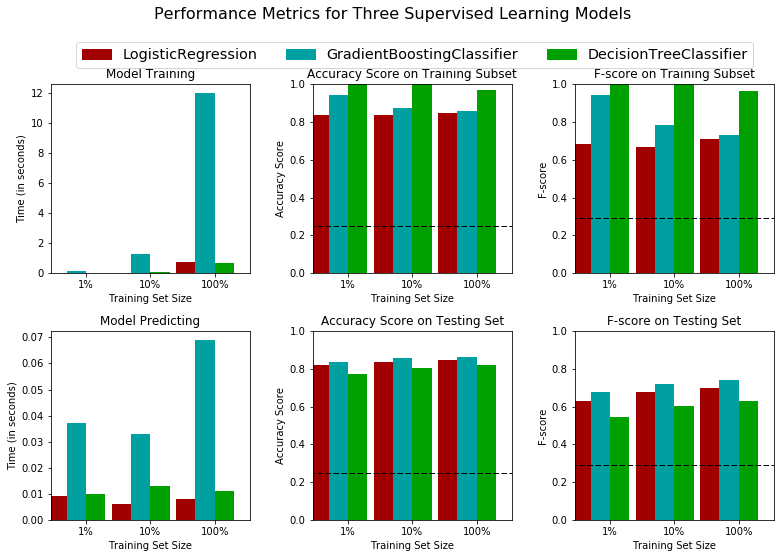

In [29]:
# TODO: Import the three supervised learning models from sklearn

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier 
from sklearn.tree import DecisionTreeClassifier

# TODO: Initialize the three models
clf_A = DecisionTreeClassifier(random_state = 5)
clf_B = LogisticRegression(random_state = 5)
clf_C = GradientBoostingClassifier(random_state = 5)


# TODO: Calculate the number of samples for 1%, 10%, and 100% of the training data
samples_1 = n_records/100
samples_10 = n_records/10
samples_100 = n_records

# Collect results on the learners
results = {}
for clf in [clf_A, clf_B, clf_C]:
    clf_name = clf.__class__.__name__
    results[clf_name] = {}
    for i, samples in enumerate([samples_1, samples_10, samples_100]):
        results[clf_name][i] = \
        train_predict(clf, samples, X_train, y_train, X_test, y_test)

# Run metrics visualization for the three supervised learning models chosen
vs.evaluate(results, accuracy, fscore)

----
## Improving Results
In this final section, you will choose from the three supervised learning models the *best* model to use on the student data. You will then perform a grid search optimization for the model over the entire training set (`X_train` and `y_train`) by tuning at least one parameter to improve upon the untuned model's F-score. 

### Question 3 - Choosing the Best Model
*Based on the evaluation you performed earlier, in one to two paragraphs, explain to *CharityML* which of the three models you believe to be most appropriate for the task of identifying individuals that make more than \$50,000.*  
**Hint:** Your answer should include discussion of the metrics, prediction/training time, and the algorithm's suitability for the data.

**Answer: **

The best performace has GradientBoostingClassifier, but it also needed longest time for model training. Shortest time was needed for training of DecisionTreeClassifier. It will be interesting to tune some learning parameters and observe if the performace approached the score of GradientBoostingClassifier.

Based on the results:

Logistic Regression achieved almost the same accuracy on training and testing sets and second best results among all the models.
DecisionTree achieved best results in training, but worst results on testing sets. The reason may be overfitting.
GradientBoosting has very stable performace on training and testing data. The accuracy and F1-score curves are nearing with the increasing amount of data. It has the best performance among all models. Disadvantage is the largest amount of time needed for computing, but it is still in acceptable range.

I go for GradientBoosting.


### Question 4 - Describing the Model in Layman's Terms
*In one to two paragraphs, explain to *CharityML*, in layman's terms, how the final model chosen is supposed to work. Be sure that you are describing the major qualities of the model, such as how the model is trained and how the model makes a prediction. Avoid using advanced mathematical or technical jargon, such as describing equations or discussing the algorithm implementation.*

**Answer: ** 

Decision Tree model mirrors human decision making very closely. In this case we can imagine the learner is asking data questions about the donors with their income over 50K  similar to this:  
- Q1: Do they have family?  Model rememebers the answer yes or no
- Q2: Do they have positive capital gain? 
- Q3: Do they have the bachelor education level?

Learner can also ask question like this:
- Q4: If they don't have family is their workclass 'self-employed'?
- Q5: If they don't have family and their workclass is 'self-employed' is thier education level 'HS-grad'?

By asking questions this way we create a tree of questions. We can create different trees which have different sequence of questions asked. We are looking for the best tree which delivers best predictions on our training and test data. During the traing we can decide maximum depth of the tree.

Gradient Boosting works this way:
To create a complex questionare which is should help to decide if person has incom over 50K is huge effort for one guy. Therefore we engage number of other guys. Each of them will get only subset of data. We also restrict guys to create limited nubmer of questions. For example only 8. To be fair, we put all the records (aka data points) in a hat. First guy will draw his subset randomly from the hat. He will note down the data from these records and put theam back into the hat. Based on the data he has, he creates his own questionre. This questionare will be tested on all records in the hat. Records which were false predicted will be multiplied in the hat. The size of the multiplication will determine the learning rate. The reason for multiplication is, that we want the next guy to have bigger chance to draw records from the hat, where previous guy was unsuccesful. To give him a chance to make questionare which can evalute the data better. The same way we will continue with third guy, with forth guy and so on. We will evaluate the prediction succes of each guy. We will stop adding new guys if the average prediction succes will stop growing. We can also trust more to the guys which individual predictions are more succesful than of the others. Predictions of these guys will be taken more into account before the final result of the group will be delivered.


### Implementation: Model Tuning
Fine tune the chosen model. Use grid search (`GridSearchCV`) with at least one important parameter tuned with at least 3 different values. You will need to use the entire training set for this. In the code cell below, you will need to implement the following:
- Import [`sklearn.grid_search.GridSearchCV`](http://scikit-learn.org/0.17/modules/generated/sklearn.grid_search.GridSearchCV.html) and [`sklearn.metrics.make_scorer`](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.make_scorer.html).
- Initialize the classifier you've chosen and store it in `clf`.
 - Set a `random_state` if one is available to the same state you set before.
- Create a dictionary of parameters you wish to tune for the chosen model.
 - Example: `parameters = {'parameter' : [list of values]}`.
 - **Note:** Avoid tuning the `max_features` parameter of your learner if that parameter is available!
- Use `make_scorer` to create an `fbeta_score` scoring object (with $\beta = 0.5$).
- Perform grid search on the classifier `clf` using the `'scorer'`, and store it in `grid_obj`.
- Fit the grid search object to the training data (`X_train`, `y_train`), and store it in `grid_fit`.

**Note:** Depending on the algorithm chosen and the parameter list, the following implementation may take some time to run!

In [32]:
# TODO: Import 'GridSearchCV', 'make_scorer', and any other necessary libraries
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
from sklearn import tree
from sklearn.metrics import fbeta_score
from sklearn.linear_model import LogisticRegression

# TODO: Initialize the classifier
clf = GradientBoostingClassifier(random_state = 5)

# TODO: Create the parameters list you wish to tune
parameters = { 'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10], 'n_estimators':[5, 10, 20, 40, 80, 160 ] }

def performance_metric(y_true, y_predict):
    score = fbeta_score(y_true, y_predict, 0.5)
    return score

# TODO: Make an fbeta_score scoring object
scorer = make_scorer(performance_metric)

# a solution from tutor
# scorer = make_scorer(fbeta_score,beta=0.5)

start_time = time()
print "START"
# TODO: Perform grid search on the classifier using 'scorer' as the scoring method
grid_obj = GridSearchCV( clf, parameters, scorer)

# TODO: Fit the grid search object to the training data and find the optimal parameters
grid_fit = grid_obj.fit(X_train, y_train)
print "END"

end_time = time()
computing_time = end_time - start_time

# Get the estimator
best_clf = grid_fit.best_estimator_

# Make predictions using the unoptimized and model
predictions = (clf.fit(X_train, y_train)).predict(X_test)
best_predictions = best_clf.predict(X_test)

# Report the before-and-afterscores
print "Unoptimized model\n------"
print "Accuracy score on testing data: {:.4f}".format(accuracy_score(y_test, predictions))
print "F-score on testing data: {:.4f}".format(fbeta_score(y_test, predictions, beta = 0.5))
print "\nOptimized Model\n------"
print "Final accuracy score on the testing data: {:.4f}".format(accuracy_score(y_test, best_predictions))
print "Final F-score on the testing data: {:.4f}".format(fbeta_score(y_test, best_predictions, beta = 0.5))

START
END
Unoptimized model
------
Accuracy score on testing data: 0.8630
F-score on testing data: 0.7395

Optimized Model
------
Final accuracy score on the testing data: 0.8708
Final F-score on the testing data: 0.7519


In [41]:
print "Best parameters:", grid_fit.best_params_
m, s = divmod(computing_time, 60)
h, m = divmod(m, 60)
print "Computing time [h:m:s]: {0:.0f}:{1:.0f}:{2:.1f} ".format(h,m,s)

Best parameters: {'n_estimators': 160, 'max_depth': 5}
Computing time [h:m:s]: 0:41:20.2 


### Question 5 - Final Model Evaluation
_What is your optimized model's accuracy and F-score on the testing data? Are these scores better or worse than the unoptimized model? How do the results from your optimized model compare to the naive predictor benchmarks you found earlier in **Question 1**?_  
**Note:** Fill in the table below with your results, and then provide discussion in the **Answer** box.

#### Results:  

|     Metric     | Benchmark Predictor | Unoptimized Model | Optimized Model |
| :------------: | :-----------------: | :---------------: | :-------------: | 
| Accuracy Score |     0.2478          |      0.8201       |       0.8708    |
| F-score        |     0.2917          |      0.6317       |       0.7519    |


**Answer: **


Tuning the parameters has brought interesting gain in performence. Comparing to the naive predictor it shows significant higher succesful prediction rate. Naive predictor is very 'naive' also unoptimized model is much more better than such benchmark predictor. 

----
## Feature Importance

An important task when performing supervised learning on a dataset like the census data we study here is determining which features provide the most predictive power. By focusing on the relationship between only a few crucial features and the target label we simplify our understanding of the phenomenon, which is most always a useful thing to do. In the case of this project, that means we wish to identify a small number of features that most strongly predict whether an individual makes at most or more than \$50,000.

Choose a scikit-learn classifier (e.g., adaboost, random forests) that has a `feature_importance_` attribute, which is a function that ranks the importance of features according to the chosen classifier.  In the next python cell fit this classifier to training set and use this attribute to determine the top 5 most important features for the census dataset.

### Question 6 - Feature Relevance Observation
When **Exploring the Data**, it was shown there are thirteen available features for each individual on record in the census data.  
_Of these thirteen records, which five features do you believe to be most important for prediction, and in what order would you rank them and why?_

**Answer:**

this is my estimation:

1. capital-gain: - I understand this as an ability to accumulate capital
2. age:  - age should correlate with income, because of more experience, better paid jobs
3. education:  -  higher education traditionally corellates with higher income
4. occupation: -  I assume, thad there are industries which are better paid than the others
5. marital-status:  this is my estimation based on statistics that people with families in average tend to make more effort to find better payed jobs

6. capital-loss:
7. workclass: 
8. hours-per-week:
9. native-country: 
10. relationship:
11. race:
12. sex:
13. fnlwgt:
14. education-num:  



### Implementation - Extracting Feature Importance
Choose a `scikit-learn` supervised learning algorithm that has a `feature_importance_` attribute availble for it. This attribute is a function that ranks the importance of each feature when making predictions based on the chosen algorithm.

In the code cell below, you will need to implement the following:
 - Import a supervised learning model from sklearn if it is different from the three used earlier.
 - Train the supervised model on the entire training set.
 - Extract the feature importances using `'.feature_importances_'`.

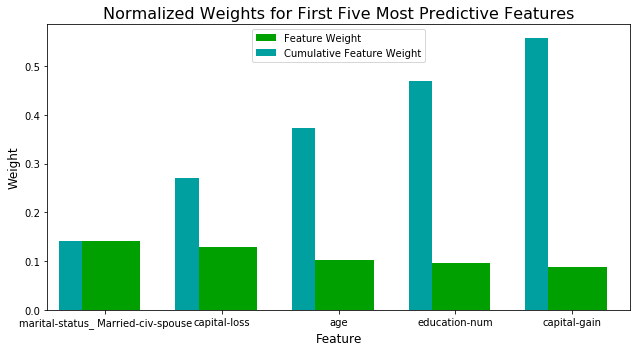

In [44]:
# TODO: Import a supervised learning model that has 'feature_importances_'

from sklearn.ensemble import GradientBoostingRegressor

# TODO: Train the supervised model on the training set 
model = GradientBoostingRegressor()
model.fit(X_train, y_train)

# TODO: Extract the feature importances
importances = model.feature_importances_

# Plot
vs.feature_plot(importances, X_train, y_train)

In [61]:
    indices = np.argsort(importances)[::-1]
    columns = X_train.columns.values[indices]
    values = importances[indices]
    print "*** TOP 10 ********************************"
    for i in range(0,10):
        print "[{0:2d}]  {1:.4f}  {2}".format(i+1, values[i], columns[i])
    

*** TOP 10 ********************************
[ 1]  0.1409  marital-status_ Married-civ-spouse
[ 2]  0.1291  capital-loss
[ 3]  0.1023  age
[ 4]  0.0965  education-num
[ 5]  0.0885  capital-gain
[ 6]  0.0594  hours-per-week
[ 7]  0.0352  occupation_ Exec-managerial
[ 8]  0.0351  relationship_ Husband
[ 9]  0.0245  sex_ Male
[10]  0.0243  workclass_ Local-gov


### Question 7 - Extracting Feature Importance

Observe the visualization created above which displays the five most relevant features for predicting if an individual makes at most or above \$50,000.  
_How do these five features compare to the five features you discussed in **Question 6**? If you were close to the same answer, how does this visualization confirm your thoughts? If you were not close, why do you think these features are more relevant?_

**Answer:**

I am quite satisfied with my estimation on the feature importance. I have swapped the feature education_level with the 'education'. But these values have to correlate.  I underestimated 
'capital-loss' in exchange for 'occupation'. 

The reason may be that 'capital-loss' is a supplement to 'capital-gain' but in negative way
I assume data points might response following corellation:

*value*: if feature value is >0
*zero*: if feature value is =0
*YES/NO*: income greater 50K

| expected correlation |  YES  |  YES  |  NO   |  NO  |
|----------------------|-------|-------|-------|------|
| capital-gain         | value | value | zero  | zero |
| capital-loss         | value | zero  | value | zero |


Why occupation didn't even make the top 5?
ocuppation () was on the 7th place, which is still good estimation
but has been surpassed by other features which corellate more with target variable.


### Feature Selection
How does a model perform if we only use a subset of all the available features in the data? With less features required to train, the expectation is that training and prediction time is much lower — at the cost of performance metrics. From the visualization above, we see that the top five most important features contribute more than half of the importance of **all** features present in the data. This hints that we can attempt to *reduce the feature space* and simplify the information required for the model to learn. The code cell below will use the same optimized model you found earlier, and train it on the same training set *with only the top five important features*. 

In [83]:
# Import functionality for cloning a model
from sklearn.base import clone

# Reduce the feature space
X_train_reduced = X_train[X_train.columns.values[(np.argsort(importances)[::-1])[:5]]]
X_test_reduced = X_test[X_test.columns.values[(np.argsort(importances)[::-1])[:5]]]

# Train on the "best" model found from grid search earlier
clf = (clone(best_clf)).fit(X_train_reduced, y_train)

# Make new predictions
reduced_predictions = clf.predict(X_test_reduced)

# Report scores from the final model using both versions of data
print "Final Model trained on full data\n------"
print "Accuracy on testing data: {:.4f}".format(accuracy_score(y_test, best_predictions))
print "F-score on testing data: {:.4f}".format(fbeta_score(y_test, best_predictions, beta = 0.5))
print "\nFinal Model trained on reduced data\n------"
print "Accuracy on testing data: {:.4f}".format(accuracy_score(y_test, reduced_predictions))
print "F-score on testing data: {:.4f}".format(fbeta_score(y_test, reduced_predictions, beta = 0.5))

Final Model trained on full data
------
Accuracy on testing data: 0.8708
F-score on testing data: 0.7519

Final Model trained on reduced data
------
Accuracy on testing data: 0.8583
F-score on testing data: 0.7224


### Question 8 - Effects of Feature Selection
*How does the final model's F-score and accuracy score on the reduced data using only five features compare to those same scores when all features are used?*  
*If training time was a factor, would you consider using the reduced data as your training set?*

**Answer:**

From my perspective, reducing data to use less features has only minor effect on the accuracy and F-score results. If traing time is the factor to consider, I will definitely recommend to reduce data to significant features only.
More often based on real values we have to decide whether to trade off speed for accuracy.


> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.